
# 🧠 Naive Bayes: Step-by-Step Mathematical Breakdown

---

## 📘 1. What is Naive Bayes?

Naive Bayes is a **probabilistic classifier** based on **Bayes' Theorem** with the assumption that all features are **conditionally independent** given the class.

It is widely used in:
- Text classification (spam filtering, sentiment analysis)
- Medical diagnosis
- Document categorization

---

## 📐 2. Bayes’ Theorem

Bayes’ Theorem describes the probability of a class $ C $ given the observed data $ X = (x_1, x_2, ..., x_n) $:
Bayes’ Theorem describes the probability of a class $C$ given the observed data  $X = (x_1, x_2, ..., x_n)$:

$$
P(C \mid X) = \frac{P(X \mid C) \cdot P(C)}{P(X)}
$$

Since $P(X)$ is constant across all classes, the classifier compares:

$$
P(C \mid X) \propto P(X \mid C) \cdot P(C)
$$

---

## 🔍 3. Naive Assumption

Assume features are **conditionally independent** given the class:

$$
P(X \mid C) = \prod_{i=1}^{n} P(x_i \mid C)
$$

Thus, we classify based on:

$$
\hat{C} = \arg\max_C P(C) \cdot \prod_{i=1}^{n} P(x_i \mid C)
$$

To avoid floating-point underflow, we take logs:

$$
\hat{C} = \arg\max_C \log P(C) + \sum_{i=1}^{n} \log P(x_i \mid C)
$$

---

## 🧪 4. Types of Naive Bayes

| Type               | Feature Type    | Use Case                 |
|--------------------|------------------|---------------------------|
| **Gaussian NB**    | Continuous       | Iris dataset              |
| **Multinomial NB** | Word Counts      | Text classification       |
| **Bernoulli NB**   | Binary features  | Spam filtering (word present/absent) |

---

## ✏️ 5. Step-by-Step Example (Multinomial NB)

**Training Data:**

| Doc | Text         | Label |
|-----|--------------|-------|
| D1  | rainy cold   | Y (Yes, it rained)    |
| D2  | sunny warm   | N (No, it didn't rain)    |
| D3  | rainy hot    | Y     |
| D4  | sunny cold   | N     |

Vocabulary: {rainy, sunny, cold, warm, hot}

### Step 1: Prior Probabilities

Let:
- Total documents = 4
- Documents with label Y = 2 → $ P(Y) = \frac{2}{4} = 0.5 $
- Documents with label N = 2 → $ P(N) = \frac{2}{4} = 0.5 $

---

### Step 2: Word Likelihoods with Laplace Smoothing

For class **Y**:

| Word  | Count | Smoothed |
|--------|--------|------------|
| rainy  | 2     | $ \frac{2+1}{4+5} = \frac{3}{9} $ |
| cold   | 1     | $ \frac{1+1}{4+5} = \frac{2}{9} $ |
| hot    | 1     | $ \frac{1+1}{4+5} = \frac{2}{9} $ |
| sunny, warm | 0 | $ \frac{0+1}{4+5} = \frac{1}{9} $ |

For class **N**:

| Word  | Count | Smoothed |
|--------|--------|------------|
| sunny  | 2     | $ \frac{2+1}{4+5} = \frac{3}{9} $ |
| cold   | 1     | $ \frac{1+1}{4+5} = \frac{2}{9} $ |
| warm   | 1     | $ \frac{1+1}{4+5} = \frac{2}{9} $ |
| rainy, hot | 0 | $ \frac{0+1}{4+5} = \frac{1}{9} $ |

(Here, 4 = total word count in class, 5 = vocab size)

---

### Step 3: Predict "sunny cold"

Feature vector: sunny = 1, cold = 1

**Compute log-probabilities:**

By this formula

$$
\hat{C} = \arg\max_C \log P(C) + \sum_{i=1}^{n} \log P(x_i \mid C)
$$

- For Y:

$$
\log P(Y) + \log P(sunny \mid Y) + \log P(cold \mid Y) = \log(0.5) + \log\left(\frac{1}{9}\right) + \log\left(\frac{2}{9}\right)
$$

- For N:

$$
\log P(N) + \log P(sunny \mid N) + \log P(cold \mid N) = \log(0.5) + \log\left(\frac{3}{9}\right) + \log\left(\frac{2}{9}\right)
$$

Then choose the class with the higher log-probability.

---




## 🧂 What is Smoothing in Naive Bayes?

Smoothing (especially **Laplace smoothing**) is a technique used in **Naive Bayes classifiers** to handle the problem of **zero probabilities** for unseen feature-class combinations.

---

### 🚫 Problem: Zero Probability

In Naive Bayes, we compute:

$$
P(C \mid X) \propto P(C) \cdot \prod_{i=1}^n P(x_i \mid C)
$$

If any feature $x_i$ has **never occurred** in class $C$ in the training set, then:

$$
P(x_i \mid C) = 0 \Rightarrow P(C \mid X) = 0
$$

This is problematic, because one missing word or feature can wipe out the entire probability for that class.

---

### 🧂 Solution: Laplace Smoothing

Laplace (add-one) smoothing adjusts the probability estimate to **avoid zero**:

#### 🧮 Formula:

Let:
- $N$ = total count of words in class $C$
- $V$ = vocabulary size
- $count(w, C)$ = number of times word $w$ appears in class $C$

Then:

$$
P(w \mid C) = \frac{count(w, C) + 1}{N + V}
$$

This ensures:
- All words get **non-zero probability**
- Even unseen words are handled gracefully

#### 🔁 Why Add 1?

- It assumes every word has occurred **at least once**.
- It's a **Bayesian prior** with uniform distribution over the vocabulary.

---

### 🧂 Generalized Smoothing (Add-α)

Laplace smoothing is a special case of **additive smoothing**:

$$
P(w \mid C) = \frac{count(w, C) + \alpha}{N + \alpha \cdot V}
$$

Where:
- $\alpha = 1$ → Laplace smoothing
- $\alpha < 1$ → less aggressive smoothing (e.g., Lidstone smoothing)
- $\alpha = 0$ → no smoothing (risky)

---

### ✅ Benefits of Smoothing

- Prevents **zero probabilities**
- Improves **robustness** to unseen data
- Helps especially in **text classification** with large sparse vocabularies

---

### 🧠 Intuition

Imagine a new email contains a word never seen in spam examples. Without smoothing, spam probability becomes 0. With smoothing, we give that word a **tiny non-zero probability**, letting the other features still influence the decision.

---

### 🧪 Example

If class "spam" has 10 total word occurrences and 4 distinct words:

Without smoothing:
- $count(\text{``free"}, \text{spam}) = 0$ → $P(\text{``free"} \mid \text{spam}) = 0$

With Laplace:
- $P(\text{``free"} \mid \text{spam}) = \frac{0 + 1}{10 + 4} = \frac{1}{14}$


# 🌦️ Naive Bayes Example: Text Classification

This notebook demonstrates how to classify a simple text dataset using both a manual Naive Bayes implementation and `scikit-learn`'s `MultinomialNB`.

## 🤖 Manual Implementation of Naive Bayes

In [1]:
import numpy as np
from collections import defaultdict

# Step 1: Training data
docs = [
    ("rainy cold", "Y"),
    ("sunny warm", "N"),
    ("rainy hot", "Y"),
    ("sunny cold", "N"),
]

# Step 2: Preprocessing
vocab = set()
class_word_counts = defaultdict(lambda: defaultdict(int))
class_counts = defaultdict(int)

# Count words per class
for text, label in docs:
    words = text.split()
    class_counts[label] += 1
    for word in words:
        vocab.add(word)
        class_word_counts[label][word] += 1

vocab = sorted(vocab)
V = len(vocab)

# Total words per class
total_words_per_class = {cls: sum(word_dict.values()) for cls, word_dict in class_word_counts.items()}

# Step 3: Calculate priors
total_docs = len(docs)
priors = {cls: count / total_docs for cls, count in class_counts.items()}

# Step 4: Likelihood with Laplace smoothing
def likelihood(word, cls):
    return (class_word_counts[cls][word] + 1) / (total_words_per_class[cls] + V)

# Step 5: Predict new document
def predict(text):
    words = text.split()
    scores = {}
    for cls in priors:
        log_prob = np.log(priors[cls])
        for word in words:
            log_prob += np.log(likelihood(word, cls))
        scores[cls] = log_prob
    return max(scores, key=scores.get), scores

# Step 6: Test on 'sunny cold'
prediction, class_scores = predict("sunny cold")
print("Manual Prediction:", prediction)
print("Log-Probabilities:", class_scores)

Manual Prediction: N
Log-Probabilities: {'Y': -4.394449154672439, 'N': -3.295836866004329}


## 🤖 Naive Bayes using scikit-learn

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

# Step 1: Training data
X_train = ["rainy cold", "sunny warm", "rainy hot", "sunny cold"]
y_train = ["Y", "N", "Y", "N"]

# Step 2: Vectorize
vectorizer = CountVectorizer()
X_counts = vectorizer.fit_transform(X_train)

# Step 3: Train
model = MultinomialNB()
model.fit(X_counts, y_train)

# Step 4: Predict
X_test = vectorizer.transform(["sunny cold"])
pred = model.predict(X_test)
prob = model.predict_proba(X_test)

# Step 5: Output
print("Scikit-learn Prediction:", pred[0])
print("Class Probabilities:", dict(zip(model.classes_, prob[0])))

Scikit-learn Prediction: N
Class Probabilities: {'N': 0.7500000000000001, 'Y': 0.24999999999999994}


## 🤖 Naive Bayes classifier with a 2D dataset and decision boundaries:

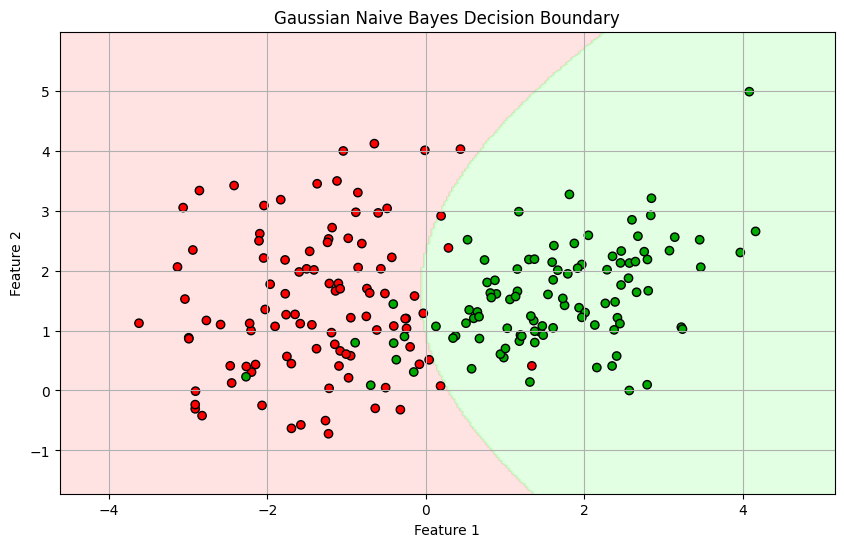

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import make_classification
from matplotlib.colors import ListedColormap

# Step 1: Generate synthetic 2D classification data
X, y = make_classification(
    n_samples=200,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    class_sep=1.5,
    random_state=42
)

# Step 2: Train a Gaussian Naive Bayes model
model = GaussianNB()
model.fit(X, y)

# Step 3: Create a mesh grid for plotting decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300), np.linspace(y_min, y_max, 300))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Step 4: Plot
plt.figure(figsize=(10, 6))
cmap_background = ListedColormap(['#FFBBBB', '#BBFFBB'])
cmap_points = ListedColormap(['#FF0000', '#00AA00'])

plt.contourf(xx, yy, Z, alpha=0.4, cmap=cmap_background)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_points, edgecolor='k', marker='o')
plt.title("Gaussian Naive Bayes Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()


## 🏆 6. Summary

- **Naive Bayes** is a simple, fast, and surprisingly effective classifier.
- Works well with high-dimensional data like text.
- Assumes **independence**, which is often violated but still performs decently.
- Use **Laplace smoothing** to avoid zero probabilities.
- Use **log-space** to avoid underflow in real applications.
## 🏁 Conclusion: Naive Bayes

- **Naive Bayes** is a fast, simple, and effective classification algorithm based on **Bayes’ Theorem** with the assumption of **feature independence**.
- It performs especially well on **text data** and **high-dimensional problems** despite its naive assumptions.
- It is easy to interpret, requires **small amounts of training data**, and is **computationally efficient**.
- Works best when:
  - Features are (roughly) independent given the class
  - Speed and simplicity are priorities
  - You need a **strong baseline** model
- Its performance may degrade when:
  - Features are strongly correlated
  - The assumption of independence is highly violated

🔑 Use Naive Bayes as a reliable first-choice model, especially for **natural language processing**, and compare its results with more complex models.